# **PANDAS LIBRARY** 

**SERIES**


In [18]:
import numpy as np
import pandas as pd

list_1 = ['a', 'b', 'c', 'd']

labels = [1, 2, 3, 4]
ser_1 = pd.Series(data=list_1, index=labels)
ser_1

1    a
2    b
3    c
4    d
dtype: object

In [ ]:
arr_1 = np.array([1, 2, 3, 4])
ser_2 = pd.Series(arr_1)
ser_2

0    1
1    2
2    3
3    4
dtype: int64

In [ ]:
dict_1 = {"f_name": "Derek","l_name": "Banas", "age": 44}
ser_3 = pd.Series(dict_1)
ser_3

f_name    Derek
l_name    Banas
age          44
dtype: object

In [ ]:
ser_3["f_name"]
ser_2.dtype

dtype('int64')

In [ ]:
ser_2 + ser_2
ser_2 - ser_2
ser_2 * ser_2
ser_2 / ser_2

0    1.0
1    1.0
2    1.0
3    1.0
dtype: float64

In [ ]:
np.exp(ser_2)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

In [ ]:
ser_4 = pd.Series({4: 5, 5: 6, 6: 7, 7: 8})
ser_2 + ser_4

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
dtype: float64

In [ ]:
ser_4 = pd.Series({8: 9, 9: 10}, name='rand_nums')
ser_4.name

'rand_nums'

**DATAFRAMES**

**Creating DATAFRAMES**

In [ ]:
from numpy import random
arr_2 = np.random.randint(10, 50, size=(2, 3))
df_1 = pd.DataFrame(arr_2, ['A', 'B'], ['C', 'D', 'E'])
df_1


,C,D,E
A,42,43,15
B,22,16,46


In [ ]:
dict_3 = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
         'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df_2 = pd.DataFrame(dict_3)
df_2

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [ ]:
pd.DataFrame.from_dict(dict([('A', [1,2,3]), ('B', [4,5,6])]))
pd.DataFrame.from_dict(dict([('A', [1,2,3]), ('B', [4,5,6])]),orient='index', columns=['one','two','three'])
print(df_1.shape)

(2, 3)



**Editing and Retrieving Data**

In [ ]:
df_1['C']
df_1[['C', 'E']]

,C,E
A,42,15
B,22,46


In [ ]:
df_1.loc['A']

C    42
D    43
E    15
Name: A, dtype: int64

In [ ]:
df_1.iloc[1]

C    22
D    16
E    46
Name: B, dtype: int64

In [ ]:
df_1.loc['A', 'C']

42

In [ ]:
print(df_1.loc[['A', 'B'], ['D', 'E']])

    D   E
A  43  15
B  16  46


In [ ]:
df_1['Total'] = df_1['C'] + df_1['D'] + df_1['E']
df_1

,C,D,E,Total
A,42,43,15,100
B,22,16,46,84


In [ ]:
df_2['mult'] = df_2['one'] * df_2['two']
df_2

,one,two,mult
a,1.0,1.0,1.0
b,2.0,2.0,4.0
c,3.0,3.0,9.0
d,NaN,4.0,NaN


In [ ]:
dict_2 = {'C': 44, 'D': 45, 'E': 46}
new_row = pd.Series(dict_2, name='F')
df_1 = df_1.append(new_row)
df_1

,C,D,E,Total
A,42.0,43.0,15.0,100.0
B,22.0,16.0,46.0,84.0
F,44.0,45.0,46.0,NaN
F,44.0,45.0,46.0,NaN


In [ ]:
df_1.drop('Total', axis=1, inplace=True)
df_1

,C,D,E
A,42.0,43.0,15.0
B,22.0,16.0,46.0
F,44.0,45.0,46.0
F,44.0,45.0,46.0


In [ ]:
df_1.drop('B', axis=0, inplace=True)
df_1

,C,D,E
A,42.0,43.0,15.0
F,44.0,45.0,46.0
F,44.0,45.0,46.0


In [ ]:
df_2.assign(div=df_2['one'] / df_2['two'])
df_2.assign(div=lambda x: (x['one'] / x['two']))
df_3 = pd.DataFrame({'A': [1., np.nan, 3., np.nan]})
df_4 = pd.DataFrame({'A': [8., 9., 2., 4.]})
df_3.combine_first(df_4)

,A
0,1.0
1,9.0
2,3.0
3,4.0


**Conditional Selection**

In [ ]:
arr_2 = np.random.randint(10, 50, size=(2, 3))
df_1 = pd.DataFrame(arr_2, ['A', 'B'], ['C', 'D', 'E'])
print(df_1)

    C   D   E
A  12  32  35
B  48  28  40


In [ ]:
print("Greater than 40\n", df_1 > 40.0)
print("Greater than 45\n", df_1.gt(45.0))

Greater than 40
        C      D      E
A  False  False  False
B   True  False  False
Greater than 45
        C      D      E
A  False  False  False
B   True  False  False


In [ ]:
bool_1 = df_1 >= 45.0
df_1[bool_1]

,C,D,E
A,NaN,NaN,NaN
B,48.0,NaN,NaN


In [ ]:
df_1['E'] > 40
df_1[df_1['E']>30]
df_2 = df_1[df_1['E']>30]
df_2['C']

A    12
B    48
Name: C, dtype: int64

In [ ]:
print(df_1[df_1['E']>20]['C'])
print()
print(df_1[df_1['E']>20][['C', 'D']])
print()

A    12
B    48
Name: C, dtype: int64

    C   D
A  12  32
B  48  28



In [ ]:
arr_3 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
df_2 = pd.DataFrame(arr_3, ['A', 'B', 'C'], ['X', 'Y', 'Z'])
print(df_2, "\n")


   X  Y  Z
A  1  2  3
B  4  5  6
C  7  8  9 



In [ ]:
df_2[(df_2['X']>3) & (df_2['X']<7)]
print(df_2, "\n")

   X  Y  Z
A  1  2  3
B  4  5  6
C  7  8  9 



**File Input and Output**

In [5]:
!pip install pymysql


     |████████████████████████████████| 51kB 3.1MB/s 


In [9]:
import pymysql
import pandas as pd
from google.colab import files 
 
uploaded = files.upload()


Saving ComputerSales.csv to ComputerSales.csv
Saving Financial Sample.xlsx to Financial Sample.xlsx


In [10]:
cs_df = pd.read_csv('ComputerSales.csv')
cs_df.to_csv('ComputerSalesBU.csv', index=False)
uploaded = files.upload()

In [ ]:
pd.read_excel('Financial Sample.xlsx',0)


,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,1618.5,3,20,32370.0,0.00,32370.00,16185.0,16185.00,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3,20,26420.0,0.00,26420.00,13210.0,13210.00,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3,15,32670.0,0.00,32670.00,21780.0,10890.00,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3,15,13320.0,0.00,13320.00,8880.0,4440.00,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3,15,37050.0,0.00,37050.00,24700.0,12350.00,2014-06-01,6,June,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,Small Business,France,Amarilla,High,2475.0,260,300,742500.0,111375.00,631125.00,618750.0,12375.00,2014-03-01,3,March,2014
696,Small Business,Mexico,Amarilla,High,546.0,260,300,163800.0,24570.00,139230.00,136500.0,2730.00,2014-10-01,10,October,2014
697,Government,Mexico,Montana,High,1368.0,5,7,9576.0,1436.40,8139.60,6840.0,1299.60,2014-02-01,2,February,2014
698,Government,Canada,Paseo,High,723.0,10,7,5061.0,759.15,4301.85,3615.0,686.85,2014-04-01,4,April,2014


In [ ]:
cs_df.to_excel('ComputerSales.xlsx')
pd.read_excel('ComputerSales.xlsx',0)


,Unnamed: 0,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
0,0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018
1,1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018
2,2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018
3,3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018
4,4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018
5,5,6,Sally Struthers,F,45,PA,GT13-0024,Desktop,1249.99,230.89,Flyer 2,April,2018
6,6,7,Michelle Samms,F,46,OH,GA401IV,Laptop,1349.99,180.34,Email,May,2018
7,7,8,Mick Roberts,M,23,OH,MY2J2LL,Tablet,999.99,146.69,Website,July,2018
8,8,9,Ed Klondike,M,52,OH,81TC00,Laptop,649.99,122.34,Email,July,2018
9,9,10,Phil Jones,M,56,WV,M01-F0024,Desktop,479.99,143.39,Flyer 2,August,2018


**Basics and Math**

In [11]:
cs_df = pd.read_csv('ComputerSales.csv')
cs_df.to_csv('ComputerSalesBU.csv', index=False)
cs_df.head()

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018
3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018


In [15]:
cs_df.tail()

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
34,35,Michelle Samms,F,46,NY,MY2J2LL,Tablet,999.99,146.69,Website,April,2020
35,36,Sally Struthers,F,45,NY,81TC00,Laptop,649.99,122.34,Website,April,2020
36,37,Jason Case,M,57,PA,M01-F0024,Desktop,479.99,143.39,Flyer 4,April,2020
37,38,Doug Johnson,M,51,PA,GA401IV,Laptop,1349.99,180.34,Website,May,2020
38,39,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,May,2020


In [14]:
cs_df[:2]

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018


In [27]:
cs_df[:5:2]

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018


In [16]:
cs_df.index.array
cs_df.to_numpy()

array([[1, 'Paul Thomas', 'M', 43, 'OH', 'M01-F0024', 'Desktop', 479.99,
        143.39, 'Website', 'January', 2018],
       [2, 'Margo Simms', 'F', 37, 'WV', 'GT13-0024', 'Desktop', 1249.99,
        230.89, 'Flyer 4', 'January', 2018],
       [3, 'Sam Stine', 'M', 26, 'PA', 'I3670', 'Desktop', 649.99,
        118.64, 'Website', 'February', 2018],
       [4, 'Moe Eggert', 'M', 35, 'PA', 'I3593', 'Laptop', 399.99, 72.09,
        'Website', 'March', 2018],
       [5, 'Jessica Elk', 'F', 55, 'PA', '15M-ED', 'Laptop', 699.99,
        98.09, 'Flyer 4', 'March', 2018],
       [6, 'Sally Struthers', 'F', 45, 'PA', 'GT13-0024', 'Desktop',
        1249.99, 230.89, 'Flyer 2', 'April', 2018],
       [7, 'Michelle Samms', 'F', 46, 'OH', 'GA401IV', 'Laptop', 1349.99,
        180.34, 'Email', 'May', 2018],
       [8, 'Mick Roberts', 'M', 23, 'OH', 'MY2J2LL', 'Tablet', 999.99,
        146.69, 'Website', 'July', 2018],
       [9, 'Ed Klondike', 'M', 52, 'OH', '81TC00', 'Laptop', 649.99,
        122.34

In [19]:
ser_1.array

<PandasArray>
['a', 'b', 'c', 'd']
Length: 4, dtype: object

In [21]:
dict_3 = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df_2 = pd.DataFrame(dict_3)
print(df_2.fillna(0))

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  0.0  4.0


In [22]:
row = df_2.iloc[1]
df_2.add(row, axis='columns')
col = df_2['two']
df_2.sub(col, axis=0)
df_2.empty


False

In [24]:
df_5 = pd.DataFrame({'A': range(3), 'B': range(1, 4)})
df_5.transform(lambda x: x+1)

,A,B
0,1,2
1,2,3
2,3,4


In [25]:
df_5.transform(lambda x: x**2)

,A,B
0,0,1
1,1,4
2,4,9


In [26]:
df_5.transform(lambda x: np.sqrt(x))

,A,B
0,0.000000,1.000000
1,1.000000,1.414214
2,1.414214,1.732051


In [28]:
df_5.transform([lambda x: x**2, lambda x: x**3])

A                 B         
  <lambda> <lambda> <lambda> <lambda>
0        0        0        1        1
1        1        1        4        8
2        4        8        9       27

In [29]:
df_5.transform({'A': lambda x: x**2, 'B': lambda x: x**3})


,A,B
0,0,1
1,1,8
2,4,27


In [30]:
df_5['A'].map(lambda x: x**2)


0    0
1    1
2    4
Name: A, dtype: int64

In [31]:
df_5.applymap(lambda x: x**2)


,A,B
0,0,1
1,1,4
2,4,9


In [32]:
df_2['two'].unique()


array([1., 2., 3., 4.])

In [33]:
df_2['two'].nunique()


4

In [34]:
df_2['two'].value_counts()


4.0    1
3.0    1
2.0    1
1.0    1
Name: two, dtype: int64

In [35]:
df_2.columns


Index(['one', 'two'], dtype='object')

In [36]:
df_2.index


Index(['a', 'b', 'c', 'd'], dtype='object')

In [37]:
df_2.isnull()

,one,two
a,False,False
b,False,False
c,False,False
d,True,False


**Group Data**

In [40]:
dict_5 = {'Store': [1,2,1,2], 'Flavor': ['Choc', 'Van', 'Straw', 'Choc'], 'Sales': [26, 12, 18, 22]}
df_11 = pd.DataFrame(dict_5)
by_store = df_11.groupby('Store')
by_store.mean()
by_store.sum().loc[1]
by_store.describe()

Sales                                              
      count  mean       std   min   25%   50%   75%   max
Store                                                    
1       2.0  22.0  5.656854  18.0  20.0  22.0  24.0  26.0
2       2.0  17.0  7.071068  12.0  14.5  17.0  19.5  22.0

**Concatenate Merge & Join Data**

In [43]:
import pandas as pd
df_12 = pd.DataFrame({'A': [1,2,3],
                     'B': [4,5,6]},
                    index=[1,2,3])
df_13 = pd.DataFrame({'A': [7,8,9],
                     'B': [10,11,12]},
                    index=[4,5,6])
pd.concat([df_12, df_13])

,A,B
1,1,4
2,2,5
3,3,6
4,7,10
5,8,11
6,9,12


In [44]:
df_12 = pd.DataFrame({'A': [1,2,3],
                     'B': [4,5,6],
                     'key': [1,2,3]})
df_13 = pd.DataFrame({'A': [7,8,9],
                     'B': [10,11,12],
                     'key': [1,2,3]})
pd.merge(df_12, df_13, how='inner', on='key')

,A_x,B_x,key,A_y,B_y
0,1,4,1,7,10
1,2,5,2,8,11
2,3,6,3,9,12


In [45]:
df_12 = pd.DataFrame({'A': [1,2,3],
                     'B': [4,5,6]},
                    index=[1,2,3])
df_13 = pd.DataFrame({'C': [7,8,9],
                     'D': [10,11,12]},
                    index=[1,4,5])
df_12.join(df_13, how='outer')

,A,B,C,D
1,1.0,4.0,7.0,10.0
2,2.0,5.0,NaN,NaN
3,3.0,6.0,NaN,NaN
4,NaN,NaN,8.0,11.0
5,NaN,NaN,9.0,12.0


**Statistics**

In [48]:
uploaded = files.upload()

Saving icecreamsales.csv to icecreamsales.csv


In [50]:
ics_df = pd.read_csv('icecreamsales.csv')
ics_df


,Temperature,Sales
0,37,292
1,40,228
2,49,324
3,61,376
4,72,440
5,79,496
6,83,536
7,81,556
8,75,496
9,64,412


In [51]:
ics_df.count()

Temperature    12
Sales          12
dtype: int64

In [52]:
ics_df.sum(skipna=True)

Temperature     734
Sales          4800
dtype: int64

In [54]:
ics_df["Sales"].mean()

400.0

In [55]:
ics_df["Sales"].median()
ics_df["Sales"].mode()
ics_df["Sales"].min()
ics_df["Sales"].max()
ics_df["Sales"].prod() 
ics_df["Sales"].std() 
ics_df["Sales"].var() 
ics_df["Sales"].sem()
ics_df["Sales"].skew()
ics_df["Sales"].kurt()
ics_df["Sales"].quantile(.5)
ics_df["Sales"].cumsum()
ics_df["Sales"].cumprod()
ics_df["Sales"].cummax()
ics_df["Sales"].cummin()


0     292
1     228
2     228
3     228
4     228
5     228
6     228
7     228
8     228
9     228
10    228
11    228
Name: Sales, dtype: int64

In [56]:
ics_df.describe()

ser_dice = pd.Series(data=[2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 
                           6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8,
                          8, 8, 9, 9, 9, 9, 10, 10, 10, 11, 11, 12])
ser_dice.value_counts()
print(df_2)
df_2.agg(np.mean)
df_2.agg(['mean', 'std'])

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0


,one,two
mean,2.0,2.500000
std,1.0,1.290994


**Iteration**

In [57]:
ser_7 = pd.Series(range(5), index=['a', 'b', 'c', 'd', 'e'])
for col in ser_7:
    print(col)
    
print()

0
1
2
3
4



In [58]:
arr_4 = np.random.randint(10, 50, size=(2, 3))
df_8 = pd.DataFrame(arr_4, ['B', 'C'], ['C', 'D', 'E'])
print(df_8)

    C   D   E
B  29  39  23
C  32  11  16


In [59]:
for label, ser in df_8.items():
    print(label)
    print(ser)
    
print()

C
B    29
C    32
Name: C, dtype: int64
D
B    39
C    11
Name: D, dtype: int64
E
B    23
C    16
Name: E, dtype: int64



In [60]:
for index, row in df_8.iterrows():
    print(f"{index}\n{row}")
print()

B
C    29
D    39
E    23
Name: B, dtype: int64
C
C    32
D    11
E    16
Name: C, dtype: int64



In [61]:
for row in df_8.itertuples():
    print(row)

Pandas(Index='B', C=29, D=39, E=23)
Pandas(Index='C', C=32, D=11, E=16)


**Sorting**

In [62]:
df_
df_8.sort_index(ascending=False)
df_8.sort_values(by='D')

NameError: ignored

**Passing Data to Functions**

In [63]:
import sys
def get_profit_total(df):
    prof_ser = df['Profit']
    print(f"Total Profit : {prof_ser.sum()}")

get_profit_total(cs_df)
def split_name(df):
    def get_names(full_name):
        f_name, l_name = full_name.split()
        return pd.Series(
        (f_name, l_name),
        index=['First Name', 'Last Name']
        )
    names = df['Contact'].apply(get_names)
    df[names.columns] = names
    return df

split_name(cs_df).head()

def create_age_groups(df):
    bins = [0, 30, 50, sys.maxsize]
    labels = ['<30', '30-50', '>50']
    age_group = pd.cut(df['Age'], bins=bins, labels=labels)
    df['Age Group'] = age_group
    return df

create_age_groups(cs_df)
cs_df.pipe(split_name).pipe(create_age_groups).head()

Total Profit : 5459.010000000001


,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year,First Name,Last Name,Age Group
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018,Paul,Thomas,30-50
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018,Margo,Simms,30-50
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018,Sam,Stine,<30
3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018,Moe,Eggert,30-50
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018,Jessica,Elk,>50


**Aligning, Reindexing and Renaming Labels**

In [64]:
ser_6 = pd.Series(range(5), index=['a', 'b', 'c', 'd', 'e'])
sl_1 = ser_6[:4]
sl_2 = ser_6[1:]
print(sl_1)
print(sl_2)


a    0
b    1
c    2
d    3
dtype: int64
b    1
c    2
d    3
e    4
dtype: int64


In [67]:
sl_1.align(sl_2)
sl_1.align(sl_2, join='left')
sl_1.align(sl_2, join='right')
sl_1.align(sl_2, join='inner')


(b    1
 c    2
 d    3
 dtype: int64, b    1
 c    2
 d    3
 dtype: int64)

In [68]:
arr_3 = np.random.randint(10, 50, size=(2, 3))
df_6 = pd.DataFrame(arr_3, ['A', 'B'], ['C', 'D', 'E'])
arr_3 = np.random.randint(10, 50, size=(2, 3))
df_7 = pd.DataFrame(arr_3, ['B', 'C'], ['C', 'D', 'E'])
df_6
df_6.align(df_7)


(      C     D     E
 A  41.0  32.0  36.0
 B  41.0  39.0  25.0
 C   NaN   NaN   NaN,       C     D     E
 A   NaN   NaN   NaN
 B  33.0  32.0  32.0
 C  38.0  24.0  17.0)

In [69]:
ser_6.reindex(['c','b','a'])
df_6.reindex(['B','A'])
df_6.drop(['A'], axis=0)
df_6.drop(['D'], axis=1)
df_6.rename(columns={'C': 'Men', 'D': 'Women', 'E': 'Pets'},index={'A': 1, 'B': 2})

,Men,Women,Pets
1,41,32,36
2,41,39,25


**Handling Missing Data**

In [70]:
dict_4 = {'A': [1,2,np.nan], 'B': [4, np.nan, np.nan], 'C': [7.,8.,9.]}
df_10 = pd.DataFrame(dict_4)
print(df_10)


     A    B    C
0  1.0  4.0  7.0
1  2.0  NaN  8.0
2  NaN  NaN  9.0


In [71]:
df_10.dropna()


,A,B,C
0,1.0,4.0,7.0


In [72]:
df_10.dropna(axis=1)
df_10.dropna(thresh=2)
df_10.fillna(value=0.0)
df_10['A'].fillna(value=df_10['A'].mean())
df_10.fillna(method='ffill')
df_10.fillna(method='bfill')

,A,B,C
0,1.0,4.0,7.0
1,2.0,NaN,8.0
2,NaN,NaN,9.0


**Experimenting with Data**

In [74]:
cs_df.head() 
print(cs_df.columns) 
cs_df['Profit'].mean()t
cs_df[['Product ID', 'Profit']].max(axis=0).head()
cs_df[cs_df['State']=='WV']['State'].count()
len(cs_df[cs_df['Year']==2019].index)
cs_df['Product ID'].value_counts()
cs_df[cs_df['Product ID']=='M01-F0024']['Contact']
cs_df[(cs_df['Lead']=='Website') & (cs_df['Profit']>150)]['Lead'].count()
cs_df['Profit'].apply(lambda cents: str(cents).split('.')[1]=='89').value_counts()

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year,First Name,Last Name,Age Group
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018,Paul,Thomas,30-50
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018,Margo,Simms,30-50
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018,Sam,Stine,<30
3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018,Moe,Eggert,30-50
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018,Jessica,Elk,>50


In [75]:
print(cs_df.columns) 
cs_df['Profit'].mean()
cs_df[['Product ID', 'Profit']].max(axis=0).head()
cs_df[cs_df['State']=='WV']['State'].count()
len(cs_df[cs_df['Year']==2019].index)
cs_df['Product ID'].value_counts()
cs_df[cs_df['Product ID']=='M01-F0024']['Contact']
cs_df[(cs_df['Lead']=='Website') & (cs_df['Profit']>150)]['Lead'].count()
cs_df['Profit'].apply(lambda cents: str(cents).split('.')[1]=='89').value_counts()


Index(['Sale ID', 'Contact', 'Sex', 'Age', 'State', 'Product ID',
       'Product Type', 'Sale Price', 'Profit', 'Lead', 'Month', 'Year',
       'First Name', 'Last Name', 'Age Group'],
      dtype='object')


False    35
True      4
Name: Profit, dtype: int64

**Visualization**

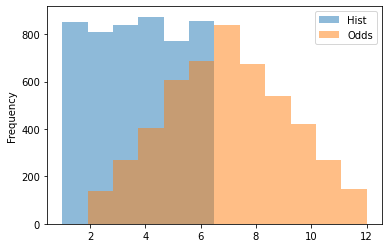

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
df_dice = pd.DataFrame(
    np.random.randint(1,7,5000),
    columns = ['Hist'])
df_dice['Odds'] = df_dice['Hist'] + np.random.randint(1,7,5000)
ax = df_dice.plot.hist(bins=12, alpha=0.5)
ser_5 = pd.Series(np.random.randn(1000),
                 index=pd.date_range('11/15/2017', periods=1000))
ser_5 = ser_5.cumsum()


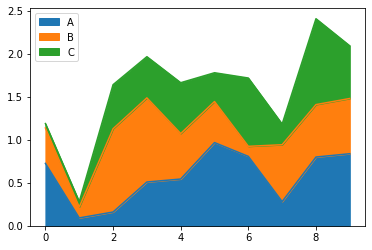

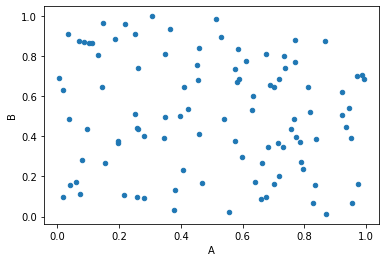

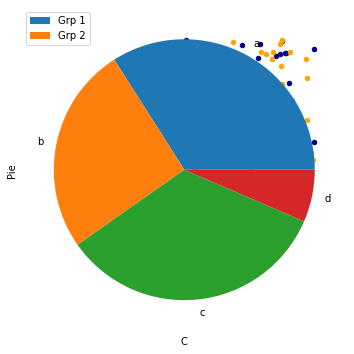

In [79]:
df_15 = pd.DataFrame(np.random.randn(1000, 3),
                    index=pd.date_range('11/15/2017', periods=1000),
                    columns=list('ABC'))
df_15 = df_15.cumsum()
vals = ['A', 'B', 'C', 'D']
df_15 = pd.DataFrame(np.random.rand(10,4), columns=vals)
x_rng = range(1,15)
y_vals = [1,5,4,7,6,9,5,7,10,14,10,12,9,8]

pd.DataFrame(np.random.rand(10,3), columns=['A','B','C']).plot.area()
pd.DataFrame(np.random.rand(100,2),columns=['A','B']).plot.scatter(x='A', y='B')
df_15 = pd.DataFrame(np.random.rand(50,4), columns=['A','B','C','D'])
ax = df_15.plot.scatter(x='A', y='B', color='DarkBlue', label='Grp 1')
df_15.plot.scatter(x='C', y='D', color='Orange', label='Grp 2', ax=ax)


pd.Series(np.random.rand(4),
         index=['a','b','c','d'], 
          name='Pie').plot.pie(figsize=(6,6))